# Regression
This notebook is to build a regression model to predict rental growth in properties in VIC per suburb.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np

In [2]:
# Read the dataframe for rental price
rental_p = pd.read_csv("../data/curated/final_drop_pcg.csv")

In [3]:
# Rename the columns that are not in usable format for the ols model
rental_p.rename(columns = {'Immediate Family': 'Imm_Family', 'Extended Family': 'Ext_Family', 'Total Suburb Population': 'Total_SAL_pop'}, inplace=True)

In [15]:
# scale the total population for each suburb for easier interpretation
rental_p['Total_SAL_pop'] = rental_p['Total_SAL_pop']/1000

In [16]:
rental_p.columns

Index(['Unnamed: 0', 'Location', 'type_property', 'price', 'state', 'rooms',
       'bath', 'parking', 'link', 'public_1', 'public_1_dis', 'public_2',
       'public_2_dis', 'private_1', 'private_1_dis', 'pulic_1_dis',
       'pulic_2_dis', 'rent', 'is_furnished', 'latitude', 'longitude',
       'geometry', 'SA2_NAME', 'SA2_CODE', 'SAL_NAME21', 'SAL_CODE',
       'Imm_Family', 'Ext_Family', 'Total_SAL_pop', 'Two persons in family',
       'Three persons in family', 'Four persons in family',
       'Five persons in family', 'Six or more persons in family',
       'Separate house', 'Semi-detached house or Townhouse',
       'Flat or Apartment', 'Non-residential properties',
       'Total Suburb Dwellings', 'coordinate', 'distance_to_melbourne_cbd_km',
       'nearest_shopping_center_distance_km',
       'nearest_tram_station_distance_km', 'nearest_train_station_distance_km',
       'nearest_bus_stop_distance_km', 'nearest_school_distance_km'],
      dtype='object')

In [23]:
# fit the linear regression model
fit = ols(
        formula= f"rent~C(type_property) + rooms + bath + parking +  Total_SAL_pop + C(is_furnished) + distance_to_melbourne_cbd_km + nearest_shopping_center_distance_km + nearest_tram_station_distance_km + nearest_train_station_distance_km + nearest_tram_station_distance_km + nearest_train_station_distance_km + nearest_bus_stop_distance_km + nearest_school_distance_km",
        data = rental_p,
    ).fit()

In [24]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     312.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:50:47   Log-Likelihood:                -80364.
No. Observations:               11499   AIC:                         1.608e+05
Df Residuals:                   11483   BIC:                         1.609e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             221.7580     11.882     18.663      0.000     198.467     245.049
C(type_property)[T.House]             -77.1869      7.613    -10.139      0.000     -92.110     -62.264
C(type_property)[T.Studio]            -94.1630     23.526     -4.002      0.000    -140.279     -48.047
C(type_property)[T.Townhouse]         -14.7374      9.595     -1.536      0.125     -33.545       4.070
C(type_property)[T.Villa]             -10.8702     49.908     -0.218      0.828    -108.699      86.959
C(is_furnished)[T.True]               101.3020     16.822      6.022      0.000      68.327     134.277
rooms                                  67.7431      3.852     17.587      0.000      60.193      75.293
bath                                  162.7216      5.081     32.023      0.000     152.761     172.682
parking                                16.6074      2.879      5.769      0.000      10.964      22.250
Total_SAL_pop                          10.3061      1.173      8.788      0.000       8.007      12.605
distance_to_melbourne_cbd_km          -10.4100      0.543    -19.158      0.000     -11.475      -9.345
nearest_shopping_center_distance_km     1.2876      0.238      5.418      0.000       0.822       1.753
nearest_tram_station_distance_km        9.2219      0.561     16.436      0.000       8.122      10.322
nearest_train_station_distance_km       2.2215      0.199     11.167      0.000       1.832       2.612
nearest_bus_stop_distance_km            8.1483      3.227      2.525      0.012       1.822      14.475
nearest_school_distance_km            -13.7592      2.787     -4.937      0.000     -19.222      -8.297
==============================================================================
Omnibus:                    14699.803   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7054617.053
Skew:                           6.675   Prob(JB):                         0.00
Kurtosis:                     123.606   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# extract the coefficients and standard errors
coefficients = fit.params
std_err = fit.bse

In [40]:
std_err[1:9]

C(type_property)[T.House]         7.613110
C(type_property)[T.Studio]       23.526438
C(type_property)[T.Townhouse]     9.594853
C(type_property)[T.Villa]        49.908239
C(is_furnished)[T.True]          16.822288
rooms                             3.851883
bath                              5.081452
parking                           2.878799
dtype: float64

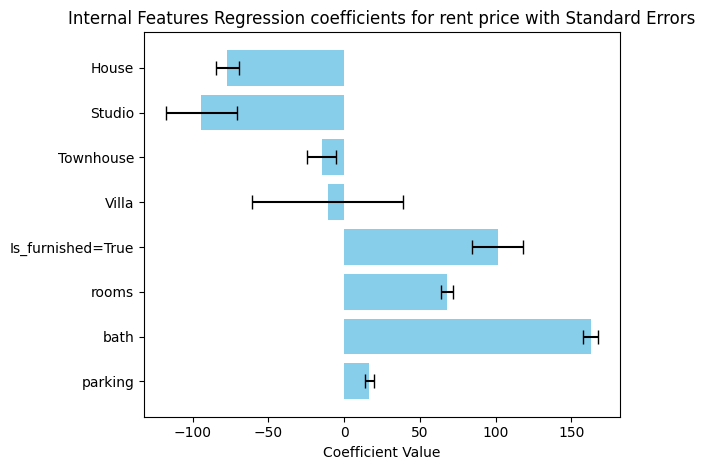

In [41]:
# Some visualisations

# Create a sideways bar plot with error bars
fig, ax = plt.subplots()

y_pos = np.arange(len(coefficients[1:9]))

ax.barh(y_pos, coefficients[1:9], xerr=std_err[1:9], align='center', color='skyblue', ecolor='black', capsize=5)
ax.set_yticks(y_pos)
ax.set_yticklabels(coefficients[1:9].index)
ax.set_xlabel('Coefficient Value')
ax.set_title('Internal Features Regression coefficients for rent price with Standard Errors')
ax.invert_yaxis()  # Highest coefficients at the top
plt.yticks(range(0, 8), ['House', 'Studio', 'Townhouse', 'Villa', 'Is_furnished=True', 'rooms','bath','parking'])
plt.tight_layout()

plt.savefig('../plots/internal_features.png')

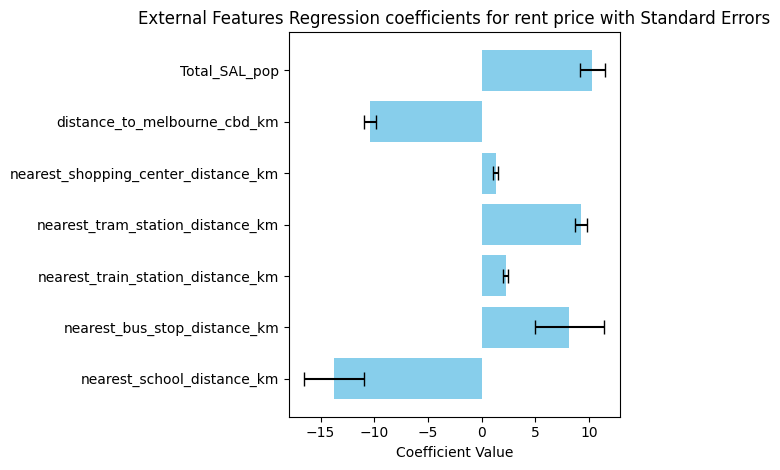

In [42]:
# Create a sideways bar plot with error bars
fig, ax = plt.subplots()

y_pos = np.arange(len(coefficients[9:]))

ax.barh(y_pos, coefficients[9:], xerr=std_err[9:], align='center', color='skyblue', ecolor='black', capsize=5)
ax.set_yticks(y_pos)
ax.set_yticklabels(coefficients[9:].index)
ax.set_xlabel('Coefficient Value')
ax.set_title('External Features Regression coefficients for rent price with Standard Errors')
ax.invert_yaxis()  # Highest coefficients at the top
plt.tight_layout()

plt.savefig('../plots/external_features.png')